# Introduction

## Project Overview

Air quality is a critical aspect of environmental health, impacting human health, climate, and ecosystems. If we had the ability to predict air pollutant levels more accurately then this can help authorities take timely action to improve air quality and minimize health risks for public. In this project, we will use the Air Quality dataset from the UCI Machine Learning Repository to develop a predictive regression model.

The dataset that we have contains data collected from an array of chemical sensors in an Italian city. It includes readings for various air pollutants and meteorological parameters, such as temperature and humidity, recorded hourly. The goal of this project is to predict carbon monoxide levels (CO(GT)), which is one of the most harmful air pollutants, based on sensor readings and weather data.

The Dataset can be found here:
1. https://archive.ics.uci.edu/dataset/360/air+quality

# Why is This Important?

Carbon monoxide as we know is a toxic gas that poses significant health risks at especially at high concentrations.Predicting its levels in the atmospheare/ air helps us to do following things:

1. It Enables to take proactive public health measures when we deem it necessary. 
2. It helps us to Inform policymakers for optimal urban air quality management. 
3. It helps us to Provide insights into the relationship between air pollution and environmental factors.

# Objectives

The main objectives of this project are:

Understand the Dataset:

We try to explore the structure of the dataset, and the relationships between features, and key patterns.
Then our goal would be to clean and preprocess the data to ensure it's suitable for modeling.

Build a Predictive Model:

1. We aim to develop a regression model to predict CO(GT), the conc. of carbon monoxide, which is measured in milligrams per cubic meter (mg/m³). 
2. We also aim to use chemical sensor readings (e.g., PT08.S1(CO), PT08.S2(NMHC)) and meteorological data (e.g., T, RH) as features.

Model Evaluation and Results:

1. We will assess the model's performance using metrics like Mean Absolute Error (MAE) and R².
2. We will analyze feature importance to understand which variables most influence carbon monoxide levels.

# Dataset Details
Source: UCI Machine Learning Repository – Air Quality Dataset.

Key Features of the dataset that we have in hand:

1. Chemical Sensor Data:
PT08.S1(CO), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2), PT08.S5(O3).

2. Meteorological Data:
T (Temperature), RH (Relative Humidity), AH (Absolute Humidity).

3. Target Variable:
CO(GT) (Carbon Monoxide levels in mg/m³).

4. Size: 7,674 rows after preprocessing.

This notebook follows the Data Science Lifecycle to ensure a systematic approach:

1. Framing the Problem: We get to know form the case study that we need to understand the need to predict CO(GT).

2. Data Acquisition: We are Utilizing the Air Quality dataset from UCI.

3. Data Exploration: We have successfully Identifyed relationships, trends, and data quality issues.

4. Data Preparation: We have also taken pro-active approach to handling missing values, engineered features, and normalized the data.

5. Modeling: We have built and trained a regression model to predict CO(GT).

6. Evaluation: We have intregated measuring metrics the model's accuracy and analyzing its outputs.

7. Insights: We have presented visuals for understanding which features most influence carbon monoxide levels and what actions could be taken based on predictions.


 # Data Loading and Initial Cleaning

In [23]:
# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/Users/samarthbasavarajannigeri/Downloads/air+quality/AirQualityUCI.csv'  # Update the path if needed
data = pd.read_csv(file_path, sep=';', decimal=',', na_values=-200)

# Drop irrelevant or empty columns
data = data.drop(columns=["Unnamed: 15", "Unnamed: 16"])

# Handle missing values for the target variable (CO(GT))
data = data.dropna(subset=["CO(GT)"])

# Impute missing values in other columns using median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
numeric_columns = data.select_dtypes(include=["float64"]).columns
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Convert 'Date' and 'Time' into usable datetime features
data["Time"] = data["Time"].str.replace('.', ':', regex=False)
data["Datetime"] = pd.to_datetime(data["Date"] + " " + data["Time"], dayfirst=True)
data["Hour"] = data["Datetime"].dt.hour
data["Day"] = data["Datetime"].dt.day
data["Month"] = data["Datetime"].dt.month
data["Year"] = data["Datetime"].dt.year

# Drop original 'Date', 'Time', and 'Datetime' columns
data = data.drop(columns=["Date", "Time", "Datetime"])

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
data = data.drop_duplicates()

# Verify data types
print(data.dtypes)

# Save the cleaned dataset to review the structure
data.head()

Number of duplicate rows: 0
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Hour               int32
Day                int32
Month              int32
Year               int32
dtype: object


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Day,Month,Year
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,10,3,2004
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,10,3,2004
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,10,3,2004
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,10,3,2004
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,10,3,2004


# Exploratory Data Analysis (EDA)

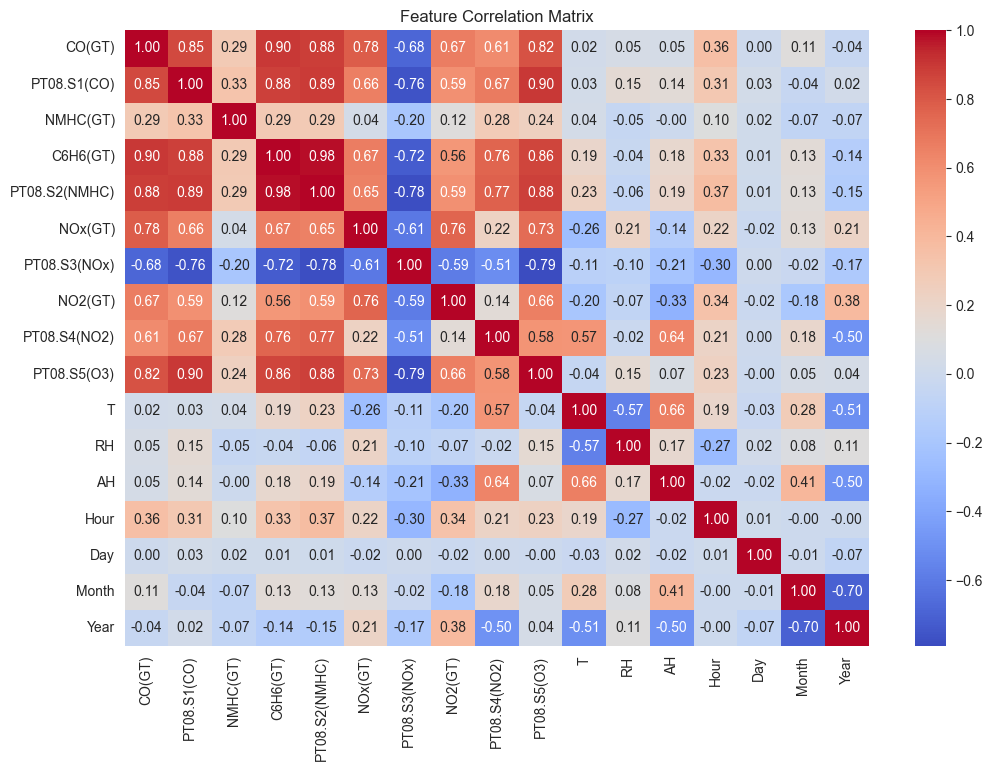

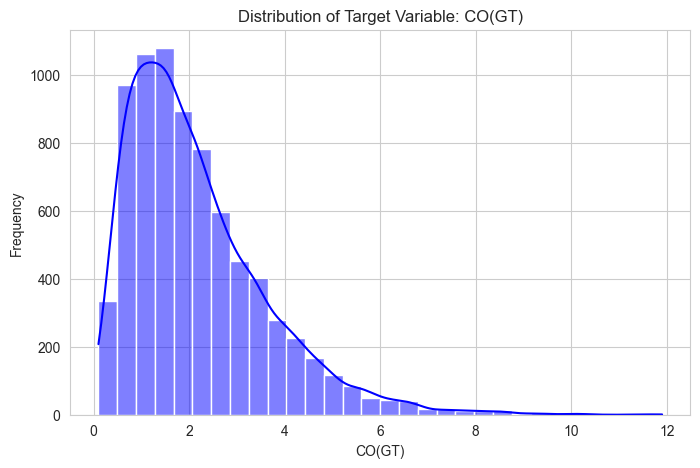

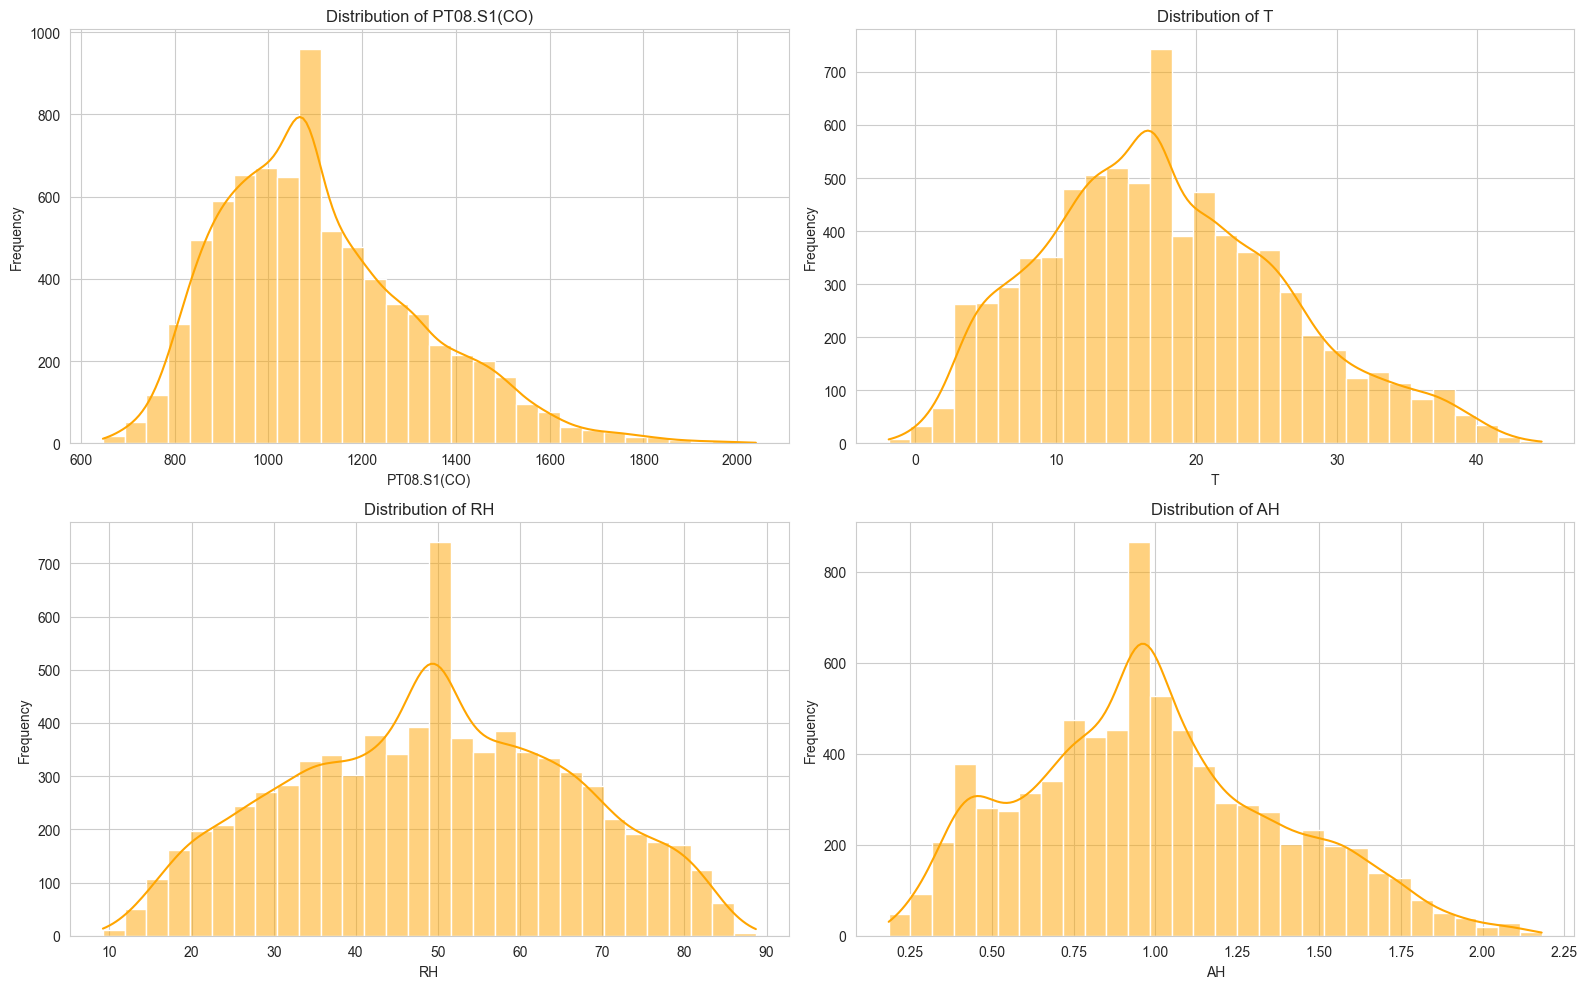

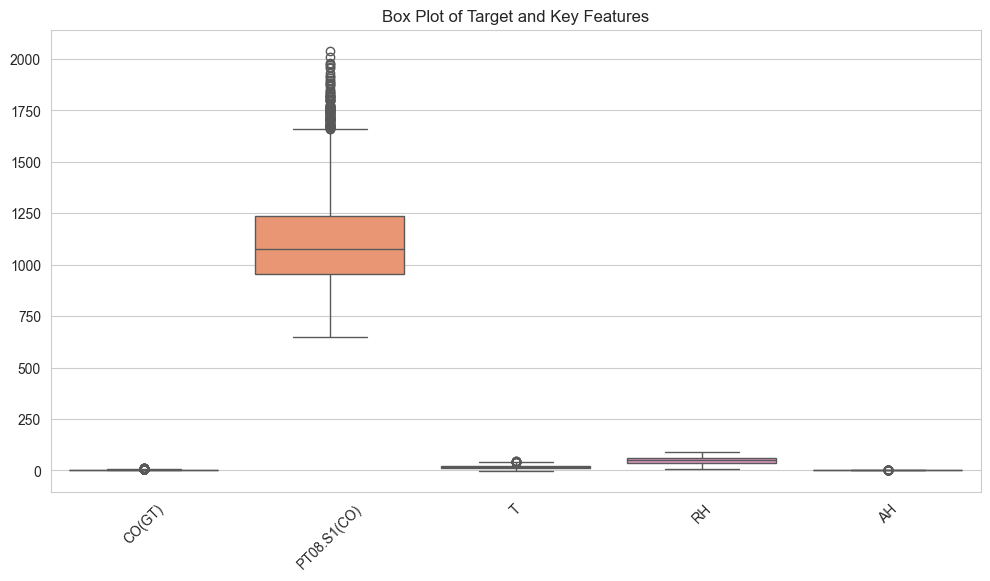

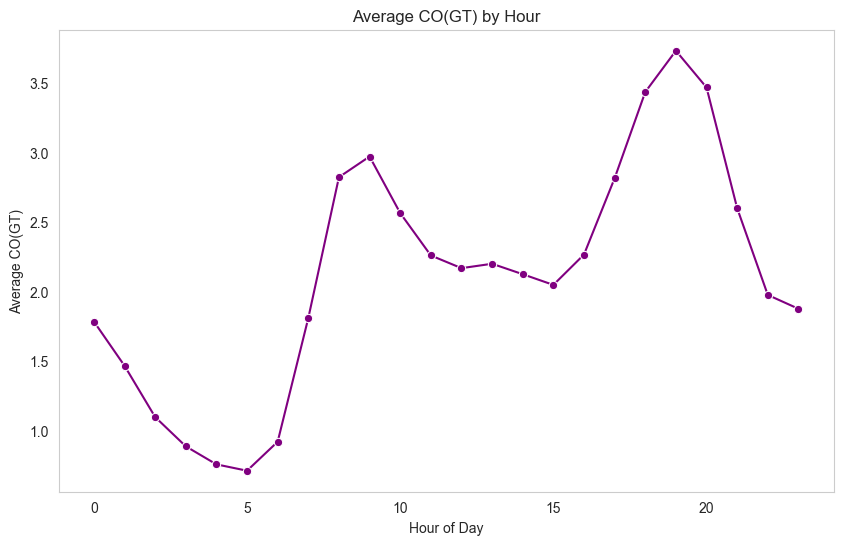

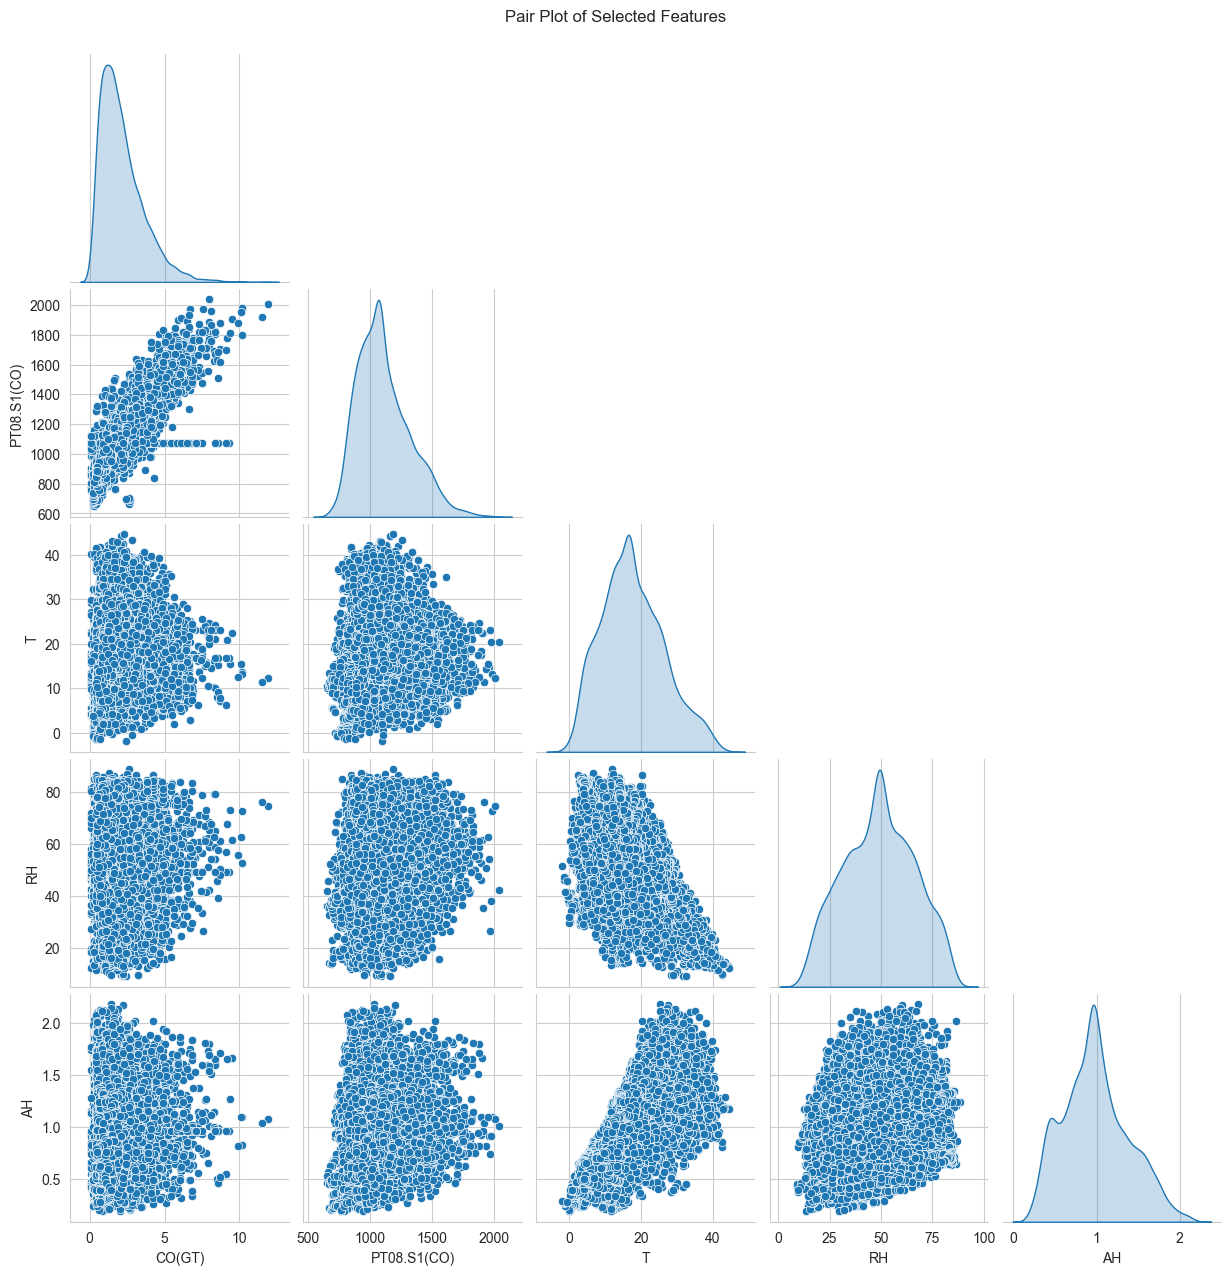

In [24]:
# Visualize relationships and data distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Check feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(data["CO(GT)"], kde=True, bins=30, color="blue")
plt.title("Distribution of Target Variable: CO(GT)")
plt.xlabel("CO(GT)")
plt.ylabel("Frequency")
plt.show()

# Distribution plots for other features
features_to_plot = ["PT08.S1(CO)", "T", "RH", "AH"]

plt.figure(figsize=(16, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, bins=30, color="orange")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Box plots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[["CO(GT)", "PT08.S1(CO)", "T", "RH", "AH"]], palette="Set2")
plt.title("Box Plot of Target and Key Features")
plt.xticks(rotation=45)
plt.show()

# Line plot for hourly variation
plt.figure(figsize=(10, 6))
hourly_avg = data.groupby("Hour")["CO(GT)"].mean()
sns.lineplot(x=hourly_avg.index, y=hourly_avg, marker="o", color="purple")
plt.title("Average CO(GT) by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average CO(GT)")
plt.grid()
plt.show()

# Pair plot for selected features
selected_features = ["CO(GT)", "PT08.S1(CO)", "T", "RH", "AH"]
sns.pairplot(data[selected_features], diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


# Data Preparation for Modeling

In [25]:
# Define target variable and features
X = data.drop(columns=["CO(GT)"])
y = data["CO(GT)"]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# Check for imbalance in the target
print("Target Variable Description (Training Set):")
print(y_train.describe())

# (used just as maybe) Log-transform the target variable if highly skewed
import numpy as np
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# Correlation Analysis
# Check for correlations in the feature set
corr_matrix = X.corr()

# Identify pairs of highly correlated features (correlation > 0.95)
correlation_threshold = 0.95  # Adjusted threshold
high_corr_pairs = set()

for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[0]):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            high_corr_pairs.add((corr_matrix.columns[i], corr_matrix.columns[j]))

print(f"Highly correlated feature pairs (threshold > {correlation_threshold}):", high_corr_pairs)

# Retain only one feature from each correlated pair
features_to_drop = set()
for pair in high_corr_pairs:
    features_to_drop.add(pair[1])  # Drop the second feature of each pair

X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

print("Remaining features after handling correlation:", X_train.columns.tolist())

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Dynamically set k to the minimum of remaining features or 10
k = min(10, X_train.shape[1])

try:
    # Select top k features based on correlation with the target
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Retrieve the selected feature names
    selected_features = selector.get_support(indices=True)
    print("Selected features:", X_train.columns[selected_features])

    # Print the shape of the transformed data
    print(f"Training set size after feature selection: {X_train_selected.shape}")
    print(f"Testing set size after feature selection: {X_test_selected.shape}")

except ValueError as e:
    print("Error in feature selection:", e)
    print("Ensure X_train and y_train have consistent shapes and sufficient data.")


Target Variable Description (Training Set):
count    6139.000000
mean        2.166297
std         1.455435
min         0.100000
25%         1.100000
50%         1.800000
75%         2.900000
max        11.900000
Name: CO(GT), dtype: float64
Highly correlated feature pairs (threshold > 0.95): {('C6H6(GT)', 'PT08.S2(NMHC)')}
Remaining features after handling correlation: ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Hour', 'Day', 'Month', 'Year']
Selected features: Index(['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'Hour', 'Month'],
      dtype='object')
Training set size after feature selection: (6139, 10)
Testing set size after feature selection: (1535, 10)


# Model Training

In [26]:
# Train a Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

print("Model training complete.")


Model training complete.


# Model Evaluation

In [20]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.12
R-squared (R2): 0.92


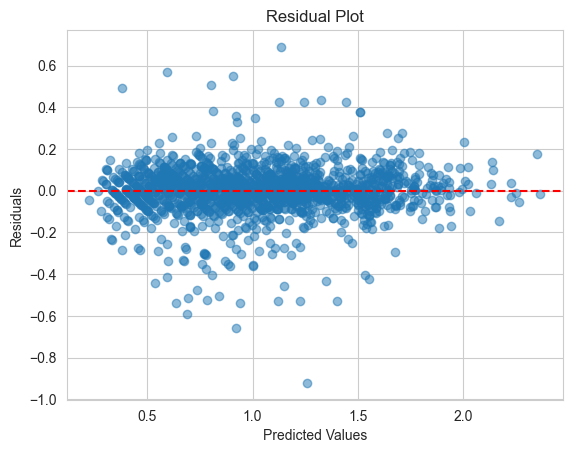

In [27]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


# Insights and Feature Importance

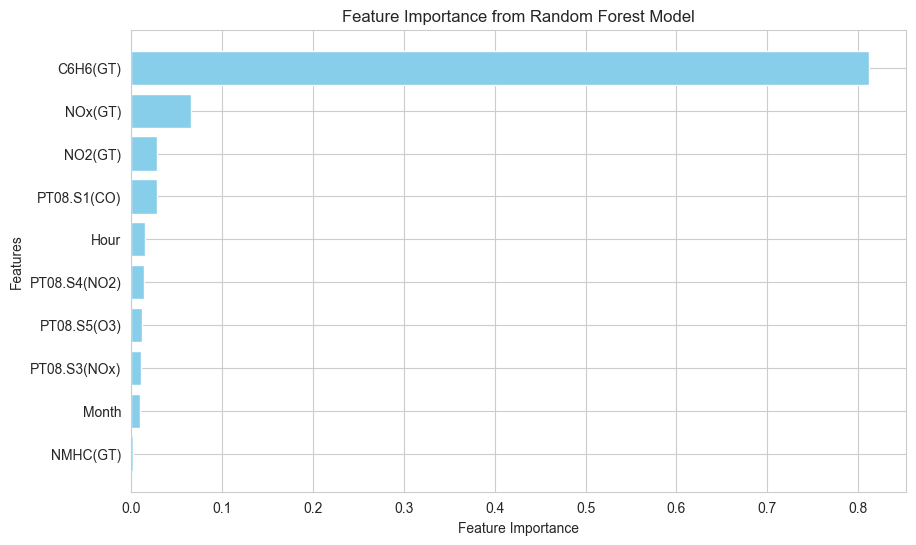

The most important feature is 'C6H6(GT)' with an importance score of 0.81.


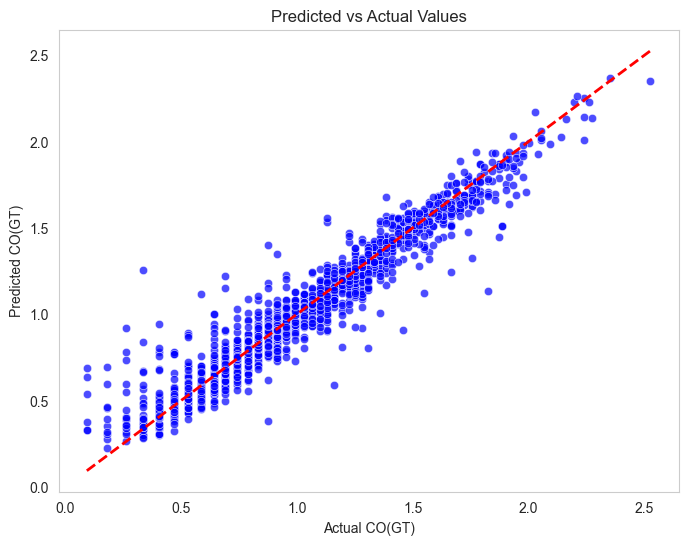

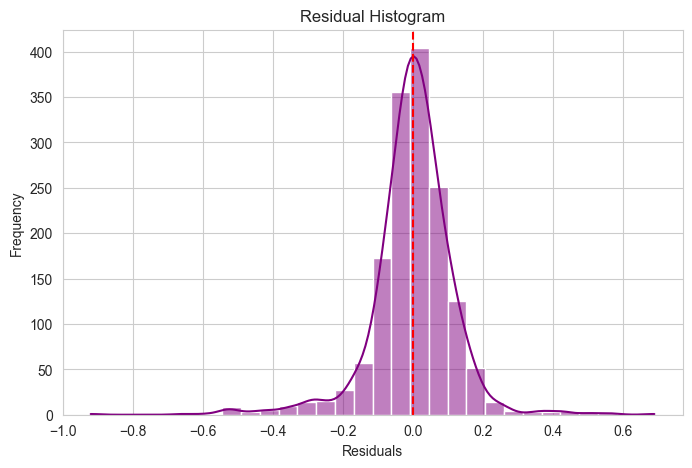

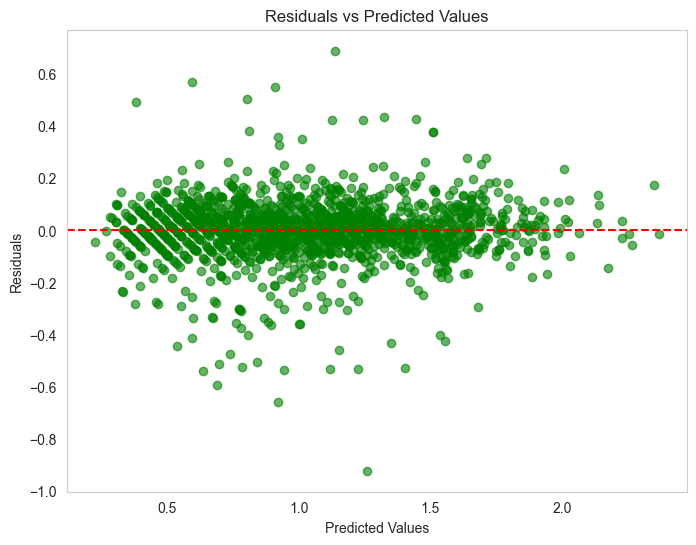

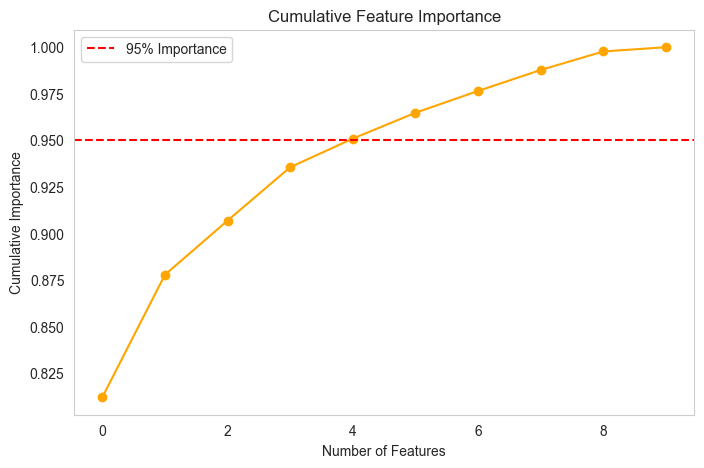

In [28]:
# Analyze feature importance
import matplotlib.pyplot as plt
import numpy as np

# Retrieve feature importance from the model
importance = model.feature_importances_
selected_feature_names = X_train.columns[selector.get_support()]

# Visualize feature importance
plt.figure(figsize=(10, 6))
indices = np.argsort(importance)[::-1]
plt.barh(selected_feature_names[indices], importance[indices], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

# Insight: Highlight the most important feature
most_important_feature = selected_feature_names[indices[0]]
print(f"The most important feature is '{most_important_feature}' with an importance score of {importance[indices[0]]:.2f}.")

# Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.grid()
plt.show()

# Residual Histogram
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.title("Residual Histogram")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5)
plt.show()

# Residuals vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color="green")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()

# Cumulative Feature Importance
cumulative_importance = np.cumsum(importance[indices])
plt.figure(figsize=(8, 5))
plt.plot(range(len(selected_feature_names)), cumulative_importance, marker='o', color='orange')
plt.title("Cumulative Feature Importance")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.grid()
plt.axhline(y=0.95, color='red', linestyle='--', linewidth=1.5, label='95% Importance')
plt.legend()
plt.show()